In [11]:
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные для анализа скорости

In [31]:
df = pd.read_csv('comparative_analysis.csv')
df

,Size,Random_Standard,Random_Hybrid,Reverse_Standard,Reverse_Hybrid,Almost_Standard,Almost_Hybrid
0,500,143,51,130,50,127,22
1,600,171,66,155,68,149,28
2,700,201,76,181,64,169,38
3,800,230,89,205,70,199,48
4,900,267,105,233,95,224,53
...,...,...,...,...,...,...,...
91,9600,3288,1627,2765,1331,2658,813
92,9700,3270,1652,2780,1422,2709,829
93,9800,3357,1671,2802,1443,2727,834
94,9900,3400,1695,2810,1402,2749,847


Строим графики с результатами замеров обычного и гибридного алгоритмов сортировки.

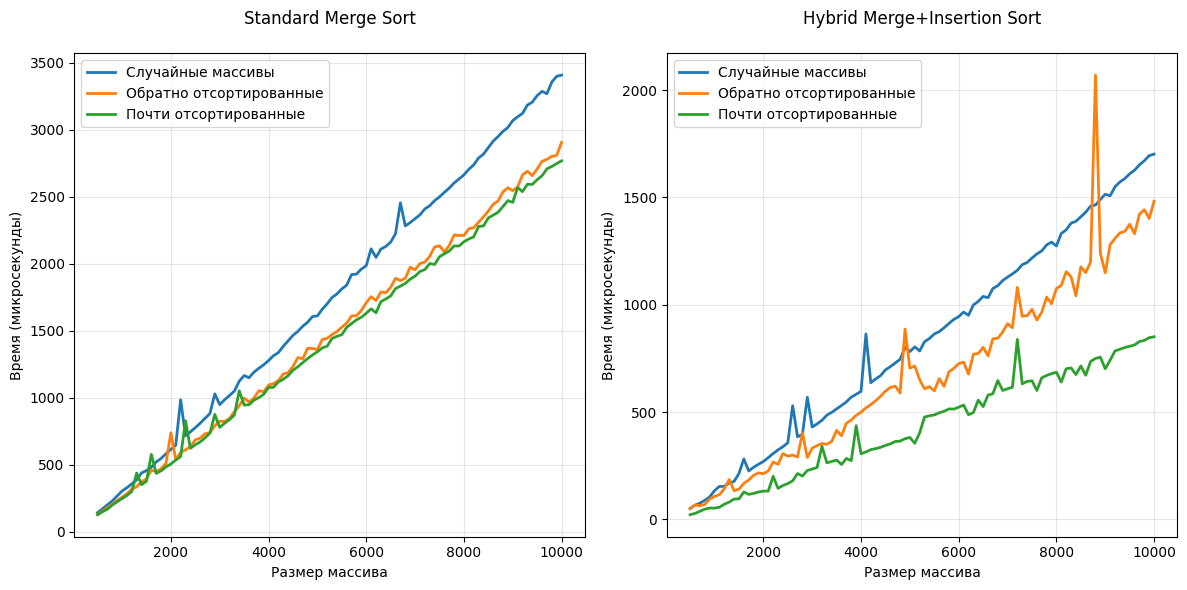

In [32]:
plt.figure(figsize=(12, 6))

#Standard Merge Sort
plt.subplot(1, 2, 1)
plt.plot(df['Size'], df['Random_Standard'], label='Случайные массивы', linewidth=2)
plt.plot(df['Size'], df['Reverse_Standard'], label='Обратно отсортированные', linewidth=2)
plt.plot(df['Size'], df['Almost_Standard'], label='Почти отсортированные', linewidth=2)
plt.xlabel('Размер массива')
plt.ylabel('Время (микросекунды)')
plt.title('Standard Merge Sort\n')
plt.legend()
plt.grid(True, alpha=0.3)

#Hybrid Merge+Insertion Sort
plt.subplot(1, 2, 2)
plt.plot(df['Size'], df['Random_Hybrid'], label='Случайные массивы', linewidth=2)
plt.plot(df['Size'], df['Reverse_Hybrid'], label='Обратно отсортированные', linewidth=2)
plt.plot(df['Size'], df['Almost_Hybrid'], label='Почти отсортированные', linewidth=2)
plt.xlabel('Размер массива')
plt.ylabel('Время (микросекунды)')
plt.title('Hybrid Merge+Insertion Sort\n')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

По графикам видно, что случайные массивы в обоих случаях дольше всего сортируются, и почти отсортированные массивы в среднем сортируются быстрее всего.



Строим графики отдельно для каждого типа входных данных. (Порог = 40)

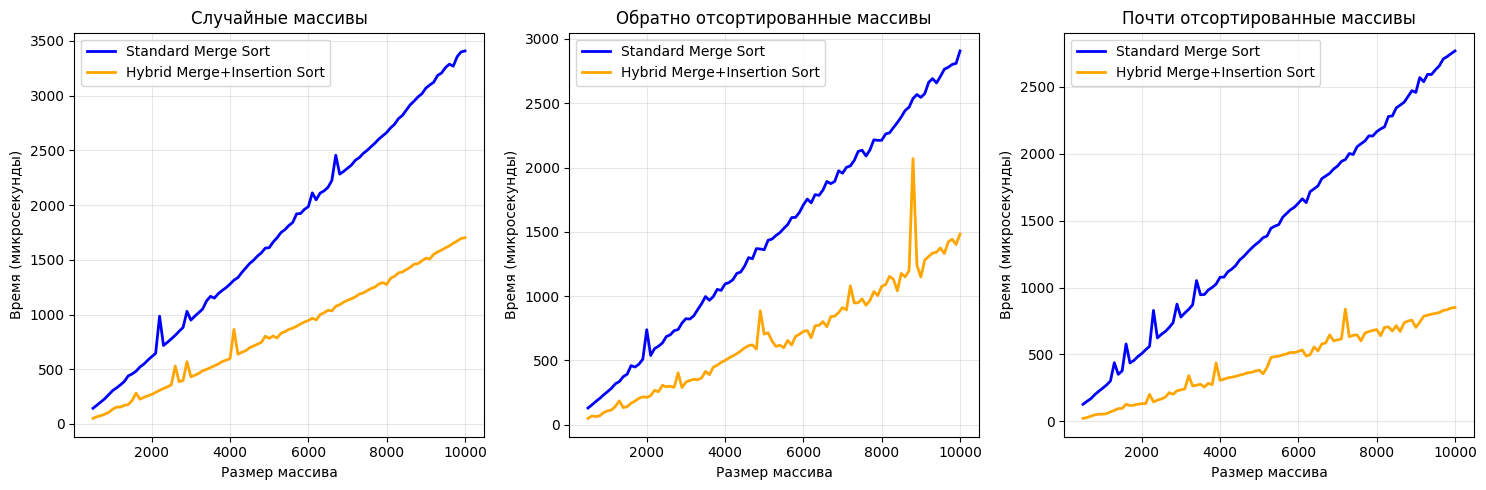

In [33]:
plt.figure(figsize=(15, 5))

# График 1: Случайные массивы
plt.subplot(1, 3, 1)
plt.plot(df['Size'], df['Random_Standard'], label='Standard Merge Sort', linewidth=2, color='blue')
plt.plot(df['Size'], df['Random_Hybrid'], label='Hybrid Merge+Insertion Sort', linewidth=2, color='orange')
plt.xlabel('Размер массива')
plt.ylabel('Время (микросекунды)')
plt.title('Случайные массивы')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Обратно отсортированные массивы
plt.subplot(1, 3, 2)
plt.plot(df['Size'], df['Reverse_Standard'], label='Standard Merge Sort', linewidth=2, color='blue')
plt.plot(df['Size'], df['Reverse_Hybrid'], label='Hybrid Merge+Insertion Sort', linewidth=2, color='orange')
plt.xlabel('Размер массива')
plt.ylabel('Время (микросекунды)')
plt.title('Обратно отсортированные массивы')
plt.legend()
plt.grid(True, alpha=0.3)

# График 3: Почти отсортированные массивы
plt.subplot(1, 3, 3)
plt.plot(df['Size'], df['Almost_Standard'], label='Standard Merge Sort', linewidth=2, color='blue')
plt.plot(df['Size'], df['Almost_Hybrid'], label='Hybrid Merge+Insertion Sort', linewidth=2, color='orange')
plt.xlabel('Размер массива')
plt.ylabel('Время (микросекунды)')
plt.title('Почти отсортированные массивы')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

На основе графиков можно сделать вывод, что при пороге 40 гибридный алгоритм Merge+Insertion Sort на всех тестовых данных показывает лучше результаты(быстрее выполняется). Также время потраченное на гибридный алгоритм с увеличением размена массива растет медленнее, чем у обычного Merge sort.

Проанализируем результаты при разных порогах перехода

In [34]:
df_threshold = pd.read_csv('threshold_analysis.csv')

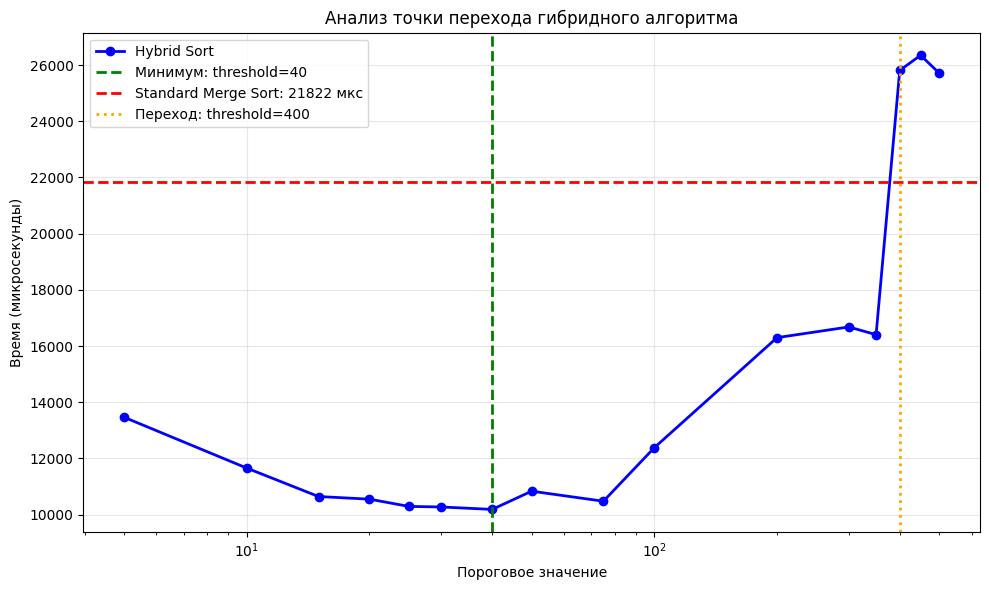

In [35]:
std_data = df_threshold[df_threshold['Threshold'] == 1000]
hybrid_data = df_threshold[df_threshold['Threshold'] != 1000]

std_time = std_data['Time(microseconds)'].iloc[0]

# Находим точку минимума
min_idx = hybrid_data['Time(microseconds)'].idxmin()
min_threshold = hybrid_data.loc[min_idx, 'Threshold']
min_time = hybrid_data.loc[min_idx, 'Time(microseconds)']

plt.figure(figsize=(10, 6))

plt.plot(hybrid_data['Threshold'], hybrid_data['Time(microseconds)'],
        marker='o', linewidth=2, markersize=6, color='blue', label='Hybrid Sort')

plt.axvline(x=min_threshold, color='green', linestyle='--', linewidth=2,
           label=f'Минимум: threshold={min_threshold}')

plt.axhline(y=std_time, color='red', linestyle='--', linewidth=2,
           label=f'Standard Merge Sort: {std_time:.0f} мкс')

slower_points = hybrid_data[hybrid_data['Time(microseconds)'] > std_time]
if not slower_points.empty:
    first_slower = slower_points.iloc[0]
    plt.axvline(x=first_slower['Threshold'], color='orange', linestyle=':', linewidth=2,
               label=f'Переход: threshold={first_slower["Threshold"]}')

plt.xlabel('Пороговое значение')
plt.ylabel('Время (микросекунды)')
plt.title('Анализ точки перехода гибридного алгоритма')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.tight_layout()
plt.show()

Вывод:
На графике показано, что минимальное значение по времени достигается при переходе на Insertion Sort при размере массива = 40, значит его необходимо использовать в реализации для достижения наилучших результатов. Также показано первое значение(treshold = 400) когда гибридный алгоритм становится медленнее обычного, при этом при значении 350(предыдущая точка на синем графике) гибридный алгоритм все ещё быстрее, значит значение при котором алгоритмы работают за одинаковое время находится между порогами 350 и 400.